# Cost of Living Projectios


## Introduction

I do not like negotiating for salary.  I like  to be transparent.  

I prepared this report to justify salary demands.  

It contains two Monte Carlo models of Houston and NYC annual living costs.  The data is somewhat dated and --particularly in the case of houston-- are high level estimates. 

In order to produce a better report, I am currently scraping data from the internet for more accurate sample distributions.  I will be able to present that soon.


## Findings

An annual salary of $90,000 would be sufficient to qualify for rent in Houston and most likely the median level income neighbors of NYC.  

I came about this number by quantifying a confidence inverval of annual rent costs in boths cities across a normal distribution.  I then simply multiplied that number by 3 to meet the lease qualifications of most landlords.  


## Limitations of the Model

### Old Nyc Data

The data I am using was sourced from 2018.   I will be updating it soon.  

### Houston Data 

The houston estimate is based an estimate to stay in the property I am currently staying in.  The rent is 2400 a month.  I estimated that it could raise at maximum to about 2600 in the next year.  If I were to move similiar housing goes for around 2200 to about 2600 a month. I used these as the bounds of my estimates


## Houston Cost of Living Expenses

I intend to stay in Houston for the next year.  I would like to move to NY eventually to be nearer to a central office, but not in the near future.  

In [118]:
lower_bound = int(2400)
upper_bound = int(2600)

median = 2500
standard_dev = 100  #file:///Users/jnapolitano/Downloads/LNG_Shipping_a_Descriptive_Analysis.pdf

cap_range = range(lower_bound, upper_bound)

rent_distribution = np.random.normal(loc=median , scale=standard_dev, size=10000)

rent_sample = choice(rent_distribution,12)

### Houston Monthly food costs


In [119]:
lower_bound = int(300)
upper_bound = int(500)

median = 400
standard_dev = 50 

food_range = range(lower_bound, upper_bound)

food_distribution = np.random.normal(loc=median , scale=standard_dev, size=10000)

food_sample = choice(food_distribution, 12)

### Houston Insurance Costs


In [120]:
lower_bound = int(200)
upper_bound = int(300)

median = 250
standard_dev = 25

insurance_range = range(lower_bound, upper_bound)

insurance_distribution = np.random.normal(loc=median , scale=standard_dev, size=10000)


#### The Houston Cost of Living DF

In [121]:
cost_of_living_df = pd.DataFrame()
cost_of_living_df['rent']= choice(rent_distribution,12)
cost_of_living_df['food'] = choice(food_distribution, 12)
cost_of_living_df['insurance'] = choice(insurance_distribution, 12)
cost_of_living_df['monthly_cost'] = cost_of_living_df.rent + cost_of_living_df.food + cost_of_living_df.insurance
cost_of_living_df

,rent,food,insurance,monthly_cost
0,2472.688851,334.419350,231.162225,3038.270426
1,2399.284893,444.677340,248.645107,3092.607340
2,2684.456976,430.277801,252.578613,3367.313390
3,2478.390464,360.661703,291.989836,3131.042002
4,2513.324309,429.771020,252.866861,3195.962190
5,2501.390892,413.121444,243.717854,3158.230190
6,2554.433859,363.994333,226.672435,3145.100627
7,2530.369935,299.997467,239.663510,3070.030911
8,2635.681318,394.667441,241.502045,3271.850803
9,2596.457738,513.944623,229.362551,3339.764912


## Houston Costs Per Annum Algorithm

The algorithm below calculates the annual cost of rent, food, and insurance to determine total cost per year.  Rent, food, and insurance are set by random choice based on the distributions defined in the functions above.  

I run the simulation 10,000 times which in theory corresponds to 10,000 random samples of annual costs.  The point in doing this is to create a random normal distribution to define convidence intervals of my total annual costs.  

In [122]:

years = 10000
year_counter = 0
#carbon_total_millions_metric_tons = 300000000
#total_tons_shipped = 0
total_price = 0
cycle_price_samples = np.zeros(shape=years)
cycle_rent_samples = np.zeros(shape=years)
cycle_food_samples = np.zeros(shape=years)
cycle_insurance_samples = np.zeros(shape=years)
annual_cost = 0


for year in range(years):
    # Define a New DataFrame. It should fall out of scope with each iteration 
    cost_of_living_df = pd.DataFrame()
    #random choice of rent 
    cost_of_living_df['rent']= choice(rent_distribution,12)
    #random choice of food
    cost_of_living_df['food'] = choice(food_distribution, 12)
    #random Choice of Insurance
    cost_of_living_df['insurance'] = choice(insurance_distribution, 12)
    #Random Choice of total annual cost
    cost_of_living_df['monthly_cost'] = cost_of_living_df.rent + cost_of_living_df.food + cost_of_living_df.insurance
    # must use apply to account for multiple 0 conditions.  If i simply vectorized the function across the dataframe in a single call i would assign the the same values each day 
    #calculate cost per day for fun...
    # query all that are = o.  Summate the capacities deduct the total 
    annual_cost = cost_of_living_df['monthly_cost'].sum()
    annual_rent = cost_of_living_df.rent.sum()
    annual_food = cost_of_living_df.food.sum()
    annual_insurance = cost_of_living_df.insurance.sum()
    cycle_price_samples[year] = annual_cost
    cycle_food_samples[year] = annual_food
    cycle_insurance_samples[year] = annual_insurance
    cycle_rent_samples[year] = annual_rent
    #print(carbon_total_millions_metric_tons)
    year_counter = year_counter+1



### Houston Prediction Df

In [123]:
prediction_df = pd.DataFrame()
prediction_df['rent'] = cycle_rent_samples
prediction_df['food'] = cycle_food_samples
prediction_df['insurance'] = cycle_insurance_samples
prediction_df['total'] = cycle_price_samples

In [124]:
prediction_df.describe()


,rent,food,insurance,total
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,30003.016272,4800.864106,2997.910667,37801.791045
std,344.473477,171.736899,86.991071,394.976839
min,28586.298471,4159.970425,2699.038887,36163.596078
25%,29771.562236,4683.226307,2940.117598,37537.005225
50%,30003.442289,4800.664909,2997.584664,37797.598919
75%,30234.927776,4915.307716,3056.853675,38072.961560
max,31370.239418,5495.020896,3314.016695,39469.935965


### Houston Annual Cost Histogram Histogram

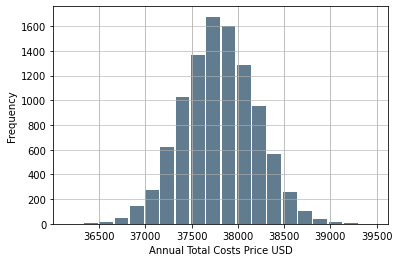

In [125]:
prediction_df.total.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.xlabel('Annual Total Costs Price USD')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

### Houston: Calculating the Confidence Interval For Total Costs

The data is nearly normal. Greater samples sizes would produce a graph of nearly perfect normality

In [126]:

st.norm.interval(alpha=0.90, loc=np.mean(prediction_df.total), scale=st.sem(prediction_df.total))

(37795.2942543157, 37808.287836034055)

### Houston Annual Rent Histogram Histogram


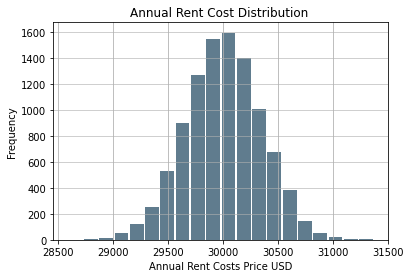

In [127]:
### Annual Cost Histogram Histogram
prediction_df.rent.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Annual Rent Cost Distribution ')
plt.xlabel('Annual Rent Costs Price USD')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

### Houston: Calculating the Confidence Interval For Annual Rent

The data is nearly normal. Greater samples sizes would produce a graph of nearly perfect normality

In [128]:

st.norm.interval(alpha=0.95, loc=np.mean(prediction_df.rent), scale=st.sem(prediction_df.rent))

(29996.264715447538, 30009.767827637417)

## New York Cost of Living Expenses

For the sake of comparison, the New York Expense distributions are calculated below.  I assume that everything but rent will be equivalent to Houston.  A more accurate model would account for insurance, food, and incidental differences.  

I am assuming the rent of a two bedroom apartment.  

The data i am using was scraped from craigslist in 2018.  I will redo it later for 2022 data to get a better model.


In [129]:
nyc_df = pd.read_csv("/Users/jnapolitano/Projects/cost-of-living-projections/nyc-housing.csv", encoding="unicode-escape")

In [130]:
#assuiming a two bedroom
nyc_df = nyc_df[nyc_df['Bedrooms']== '2br']

In [131]:
nyc_df.describe()

,Zipcode,Price
count,2626.000000,2625.000000
mean,10845.203351,2755.018286
std,556.758722,7465.827048
min,10001.000000,16.000000
25%,10065.000000,1950.000000
50%,11210.000000,2330.000000
75%,11231.000000,2922.000000
max,11697.000000,378888.000000


The price is about 2800 with a std of 7,465.  Which is absurd.  To do a better analysis, I need to clean the data. 

In [132]:

idx = (nyc_df.Price > 500) & (nyc_df.Price < 4500)
nyc_df = nyc_df[idx]

In [133]:
nyc_df.describe()

,Zipcode,Price
count,2441.000000,2441.00000
mean,10881.331422,2435.25891
std,541.102216,728.96291
min,10001.000000,600.00000
25%,10302.000000,1950.00000
50%,11211.000000,2300.00000
75%,11233.000000,2750.00000
max,11697.000000,4495.00000


When accounting for outliers the data is far more managable.  I'm surprised by the mean price.  Again this data is old, but it is also does not accout for neighborhoods.  I will redo the analysis at a later data filtered by neighborhoods.

### Creating the NYC Distributions 

In [134]:
lower_bound = int(600)
upper_bound = int(4500)

median = 2435
standard_dev = 729 

cap_range = range(lower_bound, upper_bound)

rent_distribution = np.random.normal(loc=median , scale=standard_dev, size=10000)

rent_sample = choice(rent_distribution,12)

### NYC Monthly food costs


In [135]:
lower_bound = int(300)
upper_bound = int(500)

median = 400
standard_dev = 50 

food_range = range(lower_bound, upper_bound)

food_distribution = np.random.normal(loc=median , scale=standard_dev, size=10000)

food_sample = choice(food_distribution, 12)

### NYC Insurance Costs


In [136]:
lower_bound = int(200)
upper_bound = int(300)

median = 250
standard_dev = 25

insurance_range = range(lower_bound, upper_bound)

insurance_distribution = np.random.normal(loc=median , scale=standard_dev, size=10000)


#### NYC Cost of Living Distribution

In [137]:
cost_of_living_df = pd.DataFrame()
cost_of_living_df['rent']= choice(rent_distribution,12)
cost_of_living_df['food'] = choice(food_distribution, 12)
cost_of_living_df['insurance'] = choice(insurance_distribution, 12)
cost_of_living_df['monthly_cost'] = cost_of_living_df.rent + cost_of_living_df.food + cost_of_living_df.insurance
cost_of_living_df

,rent,food,insurance,monthly_cost
0,2440.594149,404.104193,263.802114,3108.500457
1,3509.157666,399.234822,206.641152,4115.033640
2,3351.649621,297.314475,284.177204,3933.141300
3,1977.607960,359.872656,255.831381,2593.311996
4,2169.224724,386.271512,244.469415,2799.965652
5,2661.843885,356.660878,218.425732,3236.930495
6,3595.833071,385.012912,273.882653,4254.728637
7,1765.419028,404.770447,236.665360,2406.854835
8,1708.955308,348.178355,231.690103,2288.823766
9,3227.258413,392.787025,252.315570,3872.361007


## NYC Costs Per Annum Algorithm

The algorithm below calculates the annual cost of rent, food, and insurance to determine total cost per year.  Rent, food, and insurance are set by random choice based on the distributions defined in the functions above.  

I run the simulation 10,000 times which in theory corresponds to 10,000 random samples of annual costs.  The point in doing this is to create a random normal distribution to define convidence intervals of my total annual costs.  

In [138]:

years = 10000
year_counter = 0
#carbon_total_millions_metric_tons = 300000000
#total_tons_shipped = 0
total_price = 0
cycle_price_samples = np.zeros(shape=years)
cycle_rent_samples = np.zeros(shape=years)
cycle_food_samples = np.zeros(shape=years)
cycle_insurance_samples = np.zeros(shape=years)
annual_cost = 0


for year in range(years):
    # Define a New DataFrame. It should fall out of scope with each iteration 
    cost_of_living_df = pd.DataFrame()
    #random choice of rent 
    cost_of_living_df['rent']= choice(rent_distribution,12)
    #random choice of food
    cost_of_living_df['food'] = choice(food_distribution, 12)
    #random Choice of Insurance
    cost_of_living_df['insurance'] = choice(insurance_distribution, 12)
    #Random Choice of total annual cost
    cost_of_living_df['monthly_cost'] = cost_of_living_df.rent + cost_of_living_df.food + cost_of_living_df.insurance
    # must use apply to account for multiple 0 conditions.  If i simply vectorized the function across the dataframe in a single call i would assign the the same values each day 
    #calculate cost per day for fun...
    # query all that are = o.  Summate the capacities deduct the total 
    annual_cost = cost_of_living_df['monthly_cost'].sum()
    annual_rent = cost_of_living_df.rent.sum()
    annual_food = cost_of_living_df.food.sum()
    annual_insurance = cost_of_living_df.insurance.sum()
    cycle_price_samples[year] = annual_cost
    cycle_food_samples[year] = annual_food
    cycle_insurance_samples[year] = annual_insurance
    cycle_rent_samples[year] = annual_rent
    #print(carbon_total_millions_metric_tons)
    year_counter = year_counter+1



### NYC Prediction Df

In [139]:
prediction_df = pd.DataFrame()
prediction_df['rent'] = cycle_rent_samples
prediction_df['food'] = cycle_food_samples
prediction_df['insurance'] = cycle_insurance_samples
prediction_df['total'] = cycle_price_samples

In [140]:
prediction_df.describe()


,rent,food,insurance,total
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,29219.509691,4797.809482,3004.224643,37021.543816
std,2532.300418,172.673041,87.221734,2542.267617
min,18744.517281,4116.639699,2574.323735,26447.949901
25%,27545.387716,4678.877662,2945.270499,35351.052672
50%,29244.878069,4797.251203,3005.337764,37034.425389
75%,30915.545611,4915.266687,3062.210984,38722.269645
max,38516.336096,5429.519670,3327.233629,46383.324453


### NYC Annual Cost Histogram Histogram

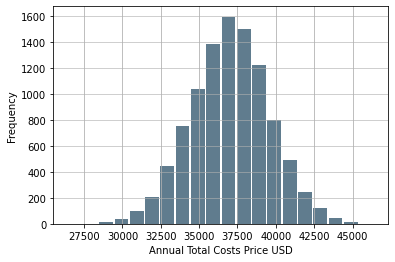

In [141]:
prediction_df.total.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.xlabel('Annual Total Costs Price USD')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

### NYC: Calculating the Confidence Interval For Total Costs

The data is nearly normal. Greater samples sizes would produce a graph of nearly perfect normality

In [142]:

st.norm.interval(alpha=0.90, loc=np.mean(prediction_df.total), scale=st.sem(prediction_df.total))

(36979.727235126586, 37063.36039733022)

### NYC Annual Rent Histogram Histogram


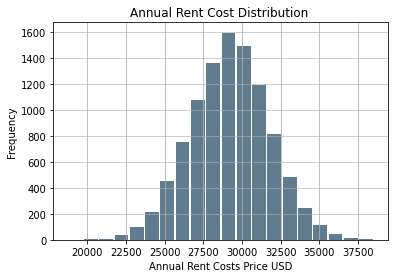

In [143]:
### Annual Cost Histogram Histogram
prediction_df.rent.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Annual Rent Cost Distribution ')
plt.xlabel('Annual Rent Costs Price USD')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

### Calculating the Confidence Interval For Annual Rent

The data is nearly normal. Greater samples sizes would produce a graph of nearly perfect normality

In [144]:

st.norm.interval(alpha=0.95, loc=np.mean(prediction_df.rent), scale=st.sem(prediction_df.rent))

(29169.877514702926, 29269.14186706609)

## NYC Closing Remarks. 

The Rent distribution in NYC with 2018 data is actually nearly comparible to my houston estimate.  An annual salary of 90,000 would permit me to live at about the median level in the city.  I will be redoing this report soon as the data is old.  I am currently scraping data in houston and nyc to produce a better analysis. 

## Imports

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from shapely.geometry import Point
from numpy.random import choice
import warnings

warnings.filterwarnings('ignore')
